<a href="https://colab.research.google.com/github/PrathamSoni4473/Machine-Learning/blob/main/LogReg_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
iris = load_iris()
dir(iris)
iris_ds = pd.DataFrame( np.c_[iris['data'],iris['target']],columns = iris['feature_names']+['target'])
iris_ds.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


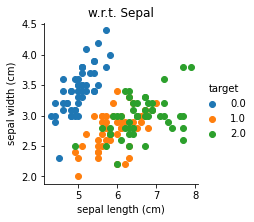

In [37]:
sns.FacetGrid(iris_ds,hue = 'target').map(plt.scatter,'sepal length (cm)','sepal width (cm)').add_legend()
plt.title('w.r.t. Sepal')
plt.show()

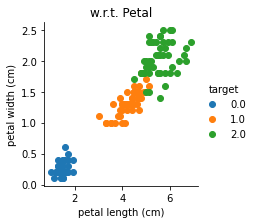

In [38]:
sns.FacetGrid(iris_ds,hue = 'target').map(plt.scatter,'petal length (cm)','petal width (cm)').add_legend()
plt.title('w.r.t. Petal')
plt.show()

In [58]:
model = LogisticRegression()
x = iris_ds.iloc[:,0:4]
y = iris_ds['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [63]:
print("Train data accuracy:",accuracy_score( y_train, model.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_test, y_predicted))

Train data accuracy: 0.9809523809523809
Test data accuracy: 0.9333333333333333


Text(33.0, 0.5, 'Truth')

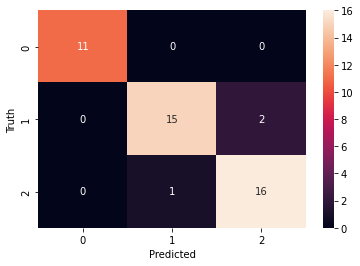

In [51]:
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')